In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 15

# All score DataFrame
results = pd.DataFrame([],columns=['Accuracy Score', "Precision Score", "Recall Score", "F1 Score"])

In [101]:
df_heart_1 = pd.read_csv("./datasets/heart_disease/heart_disease_dataset_1.csv")
df_heart_2 = pd.read_csv("./datasets/heart_disease/heart_disease_dataset_2.csv")
df_heart_3 = pd.read_csv("./datasets/heart_disease/heart_disease_dataset_3.csv")
df_heart_6 = pd.read_csv("./datasets/heart_disease/heart_disease_dataset_6.csv")

data_1 = pd.concat([df_heart_1, df_heart_2, df_heart_3, df_heart_6],ignore_index=True)
# Drop the 'thal' column
data_1.drop(['thal', 'ca', 'Unnamed: 0'], axis=1, inplace=True)
# Rename multiple columns
data_1.rename(columns={'cp': 'chest pain', 'trestbps': 'resting bps', 'chol': 'cholesterol', 
                       'fbs': 'fasting blood sugar', 'restecg': 'resting ecg', 'thalach': 'max heart rate',
                       'exang': 'exercise angina', 'target': 'disease'}, inplace=True)

df_heart_4 = pd.read_csv("./datasets/heart_disease/heart_disease_dataset_4.csv")
df_heart_5 = pd.read_csv("./datasets/heart_disease/heart_disease_dataset_5.csv")
df_heart_5.rename(columns={'resting bp s': 'resting bps'}, inplace=True)

data_2 = pd.concat([df_heart_4, df_heart_5],ignore_index=True)
data_2.drop(['Unnamed: 0'], axis=1, inplace=True)
data_2.rename(columns={'ST slope': 'slope', 'target': 'disease', 'chest pain type': 'chest pain'}, inplace=True)

df_heart_di = pd.concat([data_1, data_2],ignore_index=True)

mapping = {0: 'healthy', 1: 'heart disease'}
df_heart_di['disease'] = df_heart_di['disease'].map(mapping)
df_heart_di


,age,sex,chest pain,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,slope,disease
0,52,1,0,125,212.0,0,1,168,0,1.0,2,healthy
1,53,1,0,140,203.0,1,0,155,1,3.1,0,healthy
2,70,1,0,145,174.0,0,1,125,1,2.6,0,healthy
3,61,1,0,148,203.0,0,1,161,0,0.0,2,healthy
4,62,0,0,138,294.0,1,1,106,0,1.9,1,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...
4166,45,1,1,110,264.0,0,0,132,0,1.2,2,heart disease
4167,68,1,4,144,193.0,1,0,141,0,3.4,2,heart disease
4168,57,1,4,130,131.0,0,0,115,1,1.2,2,heart disease
4169,57,0,2,130,236.0,0,2,174,0,0.0,2,heart disease


In [194]:
df_diabetes_1 = pd.read_csv("./datasets/diabetes/diabetes_dataset_1.csv")
df_diabetes_2 = pd.read_csv("./datasets/diabetes/diabetes_dataset_2.csv")
df_diabetes_3 = pd.read_csv("./datasets/diabetes/diabetes_dataset_3.csv")
df_diabetes_4 = pd.read_csv("./datasets/diabetes/diabetes_dataset_4.csv")
df_diabetes_5 = pd.read_csv("./datasets/diabetes/diabetes_dataset_5.csv")
df_diabetes_5 = df_diabetes_5.rename(columns={'Diagnosis': 'Outcome'}, inplace=True)
df_diabetes = pd.concat([df_diabetes_1, df_diabetes_2, df_diabetes_3, df_diabetes_4, df_diabetes_5],ignore_index=True)
df_diabetes.rename(columns={'Outcome': 'disease', 'Age': 'age'}, inplace=True)

mapping = {0: 'healthy', 1: 'diabetes'}
df_diabetes['disease'] = df_diabetes['disease'].map(mapping)
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,age,disease
0,6,148,72,35,0,33.6,0.627,50,diabetes
1,1,85,66,29,0,26.6,0.351,31,healthy
2,8,183,64,0,0,23.3,0.672,32,diabetes
3,1,89,66,23,94,28.1,0.167,21,healthy
4,0,137,40,35,168,43.1,2.288,33,diabetes
...,...,...,...,...,...,...,...,...,...
5531,2,75,64,24,55,29.7,0.370,33,healthy
5532,8,179,72,42,130,32.7,0.719,36,diabetes
5533,6,85,78,0,0,31.2,0.382,42,healthy
5534,0,129,110,46,130,67.1,0.319,26,diabetes


In [216]:
data = pd.concat([df_heart_di, df_diabetes],ignore_index=True)
data

,age,sex,chest pain,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,slope,disease,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,52,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,70,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,61,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,62,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,1.0,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9702,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,healthy,2.0,75.0,64.0,24.0,55.0,29.7,0.370
9703,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,diabetes,8.0,179.0,72.0,42.0,130.0,32.7,0.719
9704,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,healthy,6.0,85.0,78.0,0.0,0.0,31.2,0.382
9705,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,diabetes,0.0,129.0,110.0,46.0,130.0,67.1,0.319


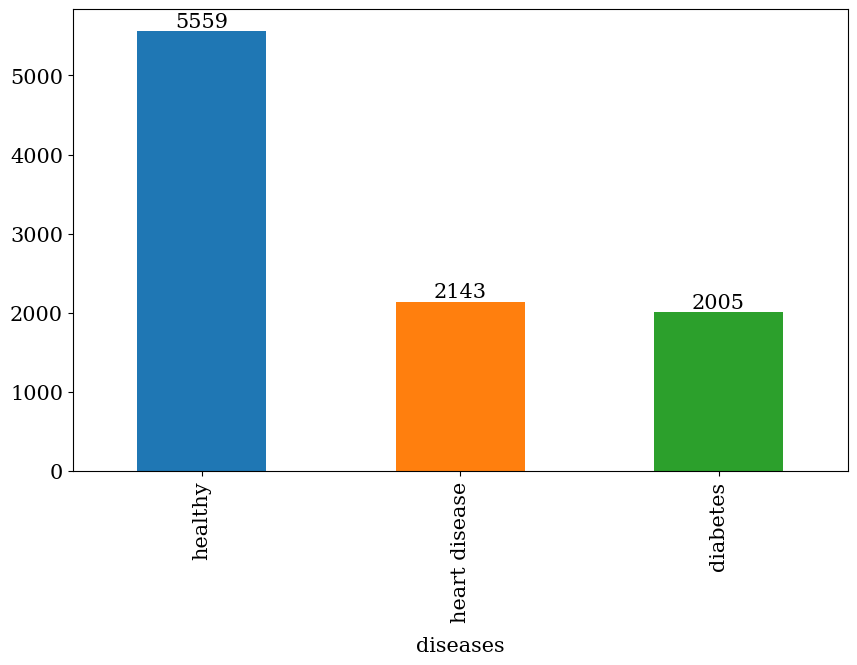

In [205]:
# Let's find how many of each class there are in the bar chart.
counts = data['disease'].value_counts()
palette = sns.color_palette()
fig, axes = plt.subplots(figsize=(10,6))
counts.plot(kind="bar", ax=axes, color=palette)
plt.xlabel('diseases',labelpad=10)
for container in axes.containers:
    axes.bar_label(container)
plt.show()

In [212]:

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, make_scorer, precision_score, f1_score, confusion_matrix, classification_report,accuracy_score, log_loss, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [213]:
def standardization(xtrain, xtest):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(xtrain)
    X_test_scaled = scaler.transform(xtest)
    return X_train_scaled, X_test_scaled

In [214]:
# label=LabelEncoder()
# data['Disease']=label.fit_transform(data['Disease'])
disease=data['disease']
features=data.drop('disease',axis=1)
X_train, X_test, Y_train, Y_test=train_test_split(features,disease,test_size=0.2, shuffle=True, random_state=42, stratify=disease)

In [215]:
# Create an imputer object with a chosen strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')
# Fit the imputer on your training data and transform it
X_train_imputed = imputer.fit_transform(X_train)
# Transform the test data using the imputer fitted on the training data
X_test_imputed = imputer.transform(X_test)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_imputed, Y_train)

# Predict on the testing set
y_pred = rf_classifier.predict(X_test_imputed)

# Evaluate the model
print("Classification Report:\n", classification_report(Y_test, y_pred))
print('accuracy', accuracy_score(Y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

     diabetes       1.00      1.00      1.00       401
      healthy       0.99      0.99      0.99      1112
heart disease       0.98      0.98      0.98       429

     accuracy                           0.99      1942
    macro avg       0.99      0.99      0.99      1942
 weighted avg       0.99      0.99      0.99      1942

accuracy 0.990216271884655


In [ ]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = X_train.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_features)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()

In [ ]:
importan_features = ['Mean Corpuscular Hemoglobin','White Blood Cells','Hematocrit','Red Blood Cells','HDL Cholesterol',
                     'ALT','Troponin','Mean Corpuscular Hemoglobin Concentration','AST','Mean Corpuscular Volume','HbA1c','LDL Cholesterol','Cholesterol']

In [ ]:
# results.loc['LogisticRegression Model'] = [test_accuracy, precision_test_score, recall_test_score, f1_test_score]
# results